In [2]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
import numpy as np
# f(x)= 3x^2 - 4x
def f(x):
    return 3*x**2-4*x

In [3]:
# f(x + h)- f(x)/h
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1

for i in range(5):
    print(f'h={h: .5f} , numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h= 0.10000 , numerical limit=2.30000
h= 0.01000 , numerical limit=2.03000
h= 0.00100 , numerical limit=2.00300
h= 0.00010 , numerical limit=2.00030
h= 0.00001 , numerical limit=2.00003


In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [5]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 tensor 或者 list有一个维度
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0],'__len__'))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] *len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()

    for x,y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)

    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

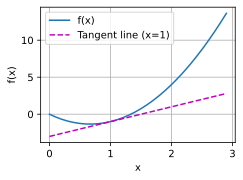

In [6]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2*x-3],'x','f(x)', legend=['f(x)','Tangent line (x=1)'])


### Partial Derivatives




### Exercises

1. 画图$y=x^3-\frac{1}{x}$ 和他的目标线 $x=1$

2. 寻找$f(x)=3x^2_1+ 5e^{x_2}$的梯度方程

3. $f(x)=\|x\|_2$ 的梯度方程是什么？

4. $u=f(x, y, z),x=x(a,b),y=(a,b),z=z(a,b)$的链式规则

D:\software\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


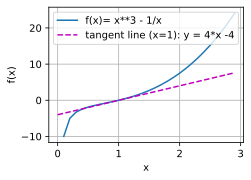

In [7]:
#1. x=1  的切线
'''
一阶导数：3x^2 + 1/(x^2)  x= 1 = 4
y(1) = 0 y-0=4(x-1)
'''

x = np.arange(0, 3, 0.1)
plot(x,[x**3 - 1/x,4*x - 4],'x','f(x)',legend=['f(x)= x**3 - 1/x','tangent line (x=1): y = 4*x -4'])